# Problema da envoltória convexa
- A computação da envoltória convexa de um conjunto de pontos no plano
- Problema consiste em encontrar o menor polígono estritamente convexo que contenha um conjunto de pontos P
- Dessa forma, se H é a envoltória convexa de P, todo ponto de P está dentro ou na borda de H
- Além disso, todos os ângulos internos de H são menores que pi
- Logo, a solução para o problema é encontrar os vértices do polígono dentre os pontos de P

## Orientação relativa de segmentos de reta
- Dados **a** e **b** dois vetores 2d. 
    - Se **|a x b|** > 0, então **a** estão numa posição horária de **b**.
    - Se **|a x b|** < 0, então **a** está numa posição horária de **b**.
    - Se **|a x b|** = 0, então **a** e **b** são colineares.
    
- A seguinte função, retorna o valor do produto vetorial para a direção da rota por segmentos

In [692]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def subtract(self, p):
        return Point(self.x - p.x, self.y - p.y)

    def __str__(self):
        return '(' + str(self.x) + ', ' + str(self.y) + ')'

In [693]:
def direction(p1, p2, p3):
    return (p2.x - p1.x) * (p3.y - p1.y) \
        -(p2.y - p1.y) * (p3.x - p1.x)

- A seguinte função encontra a distância quadrática euclidiana
- Usada para determinar qual vértice deve ficar no casco da envoltória, caso dois vértices sejam colineares

In [694]:
def squaredDistance(point1, point2):
    x1, y1 = point1.x, point1.y
    x2, y2 = point2.x, point2.y
    dx = x2 - x1
    dy = y2 - y1
    distance_squared = dx**2 + dy**2
    return distance_squared

## Encontrar ponto âncora
- Encontrar o ponto com a menor coordenada y mais à esquerda (em caso de empates)
- Como esse ponto é o mais abaixo de todos, ele é uma escolha segura para ser um vértice da envoltória

In [695]:
def leftmost(points):
    leftMostIndex = 0
    for i in range(1,len(points)):
        if points[i].x < points[leftMostIndex].x:
            leftMostIndex = i
        elif points[i].x == points[leftMostIndex].x:
            if points[i].y > points[leftMostIndex].y:
                leftMostIndex = i
    return leftMostIndex

## Algoritmo embrulho para presente (gift wrapping)

- Proposto por R.A. Jarvis em 1973
- Possui complexidade O(nh), h é o número de vértices presentes no casco da envoltória
- Ideia do algoritmo:
    - Imagine que você tenha um conjunto de pregos em um tabuleiro (pontos)
    - Ate uma corda no prego mais ao sul do tabuleiro
    - Puxe a corda para a direita e depois para cima até encontrar o próximo prego
    - Ate a corda a esse prego e repita o processo até retornar o primeiro
- Formalmente:
    - Escolha um vértice para iniciar o processamento (vértice âncora)
    - Em seguida, repita até que o vértice atual seja o vértice âncora:
        - Encontre o vértice com o menor ângulo polar à esquerda do vértice atual e mova para ele

In [696]:
def giftWrapping(points):
    # find the leftmost point
    leftmostIndex = leftmost(points)
    leftmostPoint = points[leftmostIndex]

    # selection sort
    l = leftmostIndex
    hull = []
    hull.append(leftmostPoint)
    while (True):
        q = (l+1) % len(points)
        for i in range(len(points)):
            if i == l:
                continue
            # find the greates left turn
            # in case of collinearity, consider the farthest point
            d = direction(points[l], points[i], points[q])
            if d > 0 or (d == 0 and squaredDistance(points[i], points[l]) > squaredDistance(points[q], points[l])):
                q = i
            
        l = q
        if l == leftmostIndex:
            break
        hull.append(points[q])   

    return hull

## Testando o algoritmo embrulho para presente

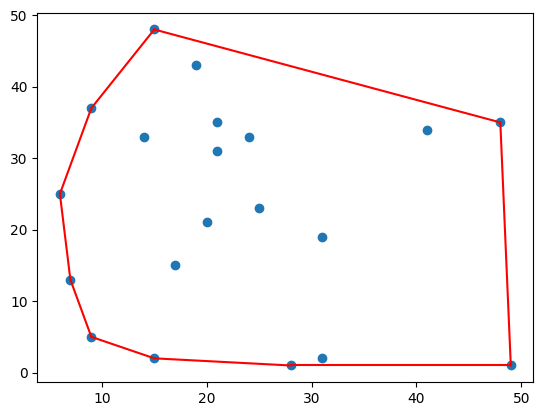

In [697]:
from matplotlib import pyplot as plt
from random import uniform, randint

def create_points(ct, min = 0, max = 50):
    return [Point(randint(min, max), randint(min, max)) for _ in range(ct)]

def scatter_plot(coords, convex_hull = None):
    xs = []
    ys = []
    for coord in coords:
        xs.append(coord.x)
        ys.append(coord.y)

    plt.scatter(xs, ys)

    if convex_hull:
        for i in range(1, len(convex_hull) + 1):
            if i == len(convex_hull): i = 0 #wrap
            c0 = convex_hull[i-1]
            c1 = convex_hull[i]
            plt.plot((c0.x, c1.x), (c0.y, c1.y), 'r')
    plt.show()
    
points = create_points(20)
hull = giftWrapping(points)

scatter_plot(points, hull)

# Determinar se há interseção de segmentos em um conjunto
- Dado um conjunto de segmentos, queremos determinar se há interseção entre quaisquer dois elementos desse conjunto


In [698]:
class Segment:
    def __init__(self, p1, p2):
        if (p1.x < p2.x):
            self.p1 = p1
            self.p2 = p2
        else:
            self.p1 = p2
            self.p2 = p1
        if (self.p2.x - self.p1.x) == 0:
            self.p2.x += 0.05
        self.mi = (self.p2.y - self.p1.y) / (self.p2.x - self.p1.x)
        self.b = self.p1.y - (self.mi * self.p1.x)

    def __str__(self):
        return '(' + str(self.p1) + ', ' + str(self.p2) + ')'
    
    def __lt__(self, other):
        z = self
        currentX = z.p1.x
        zy = z.p1.y
        othery = other.getY(currentX)

        return zy < othery
    
    def __gt__(self, other):
        z = self
        currentX = z.p2.x
        zy = z.p2.y
        othery = other.getY(currentX)

        return zy > othery

    def getY(self, x):
        return (self.mi * x) + self.b

## Red black tree

In [699]:
class Node:
  RED = True
  BLACK = False

  def __init__(self, value, color = RED):
    self.color = color
    self.value = value
    self.left = self.right = self.parent = NilNode.instance()

  def __str__(self, level = 0, indent = "   "):
    s = level * indent + str(self.value)
    if self.left:
      s = s + "\nL" + self.left.__str__(level + 1, indent)
    if self.right:
      s = s + "\nR" + self.right.__str__(level + 1, indent)
    return s

  def __nonzero__(self):
    return True

  def __bool__(self):
    return True


class NilNode(Node):
  __instance__ = None

  @classmethod
  def instance(self):
    if self.__instance__ is None:
      self.__instance__ = NilNode()
    return self.__instance__

  def __init__(self):
    self.color = Node.BLACK
    self.value = None
    self.left = self.right = self.parent = None

  def __nonzero__(self):
    return False

  def __bool__(self):
    return False

class RedBlackTree:
  def __init__(self):
    self.root = NilNode.instance()
    self.size = 0
    
  def __str__(self):
    return ("(root.size = %d)\n" % self.size)  + str(self.root)

  def add(self, value):
    self.insert(Node(value))

  def insert(self, x):
    self.__insert_helper(x)

    x.color = Node.RED
    while x != self.root and x.parent.color == Node.RED:
      if x.parent == x.parent.parent.left:
        y = x.parent.parent.right
        if y and y.color == Node.RED:
          x.parent.color = Node.BLACK
          y.color = Node.BLACK
          x.parent.parent.color = Node.RED
          x = x.parent.parent
        else:
          if x == x.parent.right:
            x = x.parent
            self.__left_rotate(x)
          x.parent.color = Node.BLACK
          x.parent.parent.color = Node.RED
          self.__right_rotate(x.parent.parent)
      else:
        y = x.parent.parent.left
        if y and y.color == Node.RED:
          x.parent.color = Node.BLACK
          y.color = Node.BLACK
          x.parent.parent.color = Node.RED
          x = x.parent.parent
        else:
          if x == x.parent.left:
            x = x.parent
            self.__right_rotate(x)
          x.parent.color = Node.BLACK
          x.parent.parent.color = Node.RED
          self.__left_rotate(x.parent.parent)
    self.root.color = Node.BLACK

  def delete(self, z):
    if not z.left or not z.right:
      y = z
    else:
      y = self.successor(z)
    if not y.left:
      x = y.right
    else:
      x = y.left
    x.parent = y.parent

    if not y.parent:
      self.root = x
    else:
      if y == y.parent.left:
        y.parent.left = x
      else:
        y.parent.right = x

    if y != z: z.value = y.value

    if y.color == Node.BLACK:
      self.__delete_fixup(x)

    self.size -= 1
    return y

  def minimum(self, x = None):
    if x is None: x = self.root
    while x.left:
      x = x.left
    return x

  def maximum(self, x = None):
    if x is None: x = self.root
    while x.right:
      x = x.right
    return x

  def successor(self, x):
    if x.right:
      return self.minimum(x.right)
    y = x.parent
    while y and x == y.right:
      x = y
      y = y.parent
    return y

  def predecessor(self, x):
    if x.left:
      return self.maximum(x.left)
    y = x.parent
    while y and x == y.left:
      x = y
      y = y.parent
    return y

  def search(self, value, x = None):
    if x is None: x = self.root
    while x and x.value != value:
      if value > x.value:
        x = x.right
      else:
        x = x.left
    return x

  def is_empty(self):
    return bool(self.root)

  def __left_rotate(self, x):
    if not x.right:
      raise "x.right is nil!"
    y = x.right
    x.right = y.left
    if y.left: y.left.parent = x
    y.parent = x.parent
    if not x.parent:
      self.root = y
    else:
      if x == x.parent.left:
        x.parent.left = y
      else:
        x.parent.right = y
    y.left = x
    x.parent = y

  def __right_rotate(self, x):
    if not x.left:
      raise "x.left is nil!"
    y = x.left
    x.left = y.right
    if y.right: y.right.parent = x
    y.parent = x.parent
    if not x.parent:
      self.root = y
    else:
      if x == x.parent.left:
        x.parent.left = y
      else:
        x.parent.right = y
    y.right = x
    x.parent = y

  def __insert_helper(self, z):
    y = NilNode.instance()
    x = self.root
    while x:
      y = x
      if z.value < x.value:
        x = x.left
      else:
        x = x.right

    z.parent = y
    if not y:
      self.root = z
    else:
      if z.value < y.value:
        y.left = z
      else:
        y.right = z
    
    self.size += 1

  def __delete_fixup(self, x):
    while x != self.root and x.color == Node.BLACK:
      if x == x.parent.left:
        w = x.parent.right
        if w.color == Node.RED:
          w.color = Node.BLACK
          x.parent.color = Node.RED
          self.__left_rotate(x.parent)
          w = x.parent.right
        if w.left.color == Node.BLACK and w.right.color == Node.BLACK:
          w.color = Node.RED
          x = x.parent
        else:
          if w.right.color == Node.BLACK:
            w.left.color = Node.BLACK
            w.color = Node.RED
            self.__right_rotate(w)
            w = x.parent.right
          w.color = x.parent.color
          x.parent.color = Node.BLACK
          w.right.color = Node.BLACK
          self.__left_rotate(x.parent)
          x = self.root
      else:
        w = x.parent.left
        if w.color == Node.RED:
          w.color = Node.BLACK
          x.parent.color = Node.RED
          self.__right_rotate(x.parent)
          w = x.parent.left
        if w.right.color == Node.BLACK and w.left.color == Node.BLACK:
          w.color = Node.RED
          x = x.parent
        else:
          if w.left.color == Node.BLACK:
            w.right.color = Node.BLACK
            w.color = Node.RED
            self.__left_rotate(w)
            w = x.parent.left
          w.color = x.parent.color
          x.parent.color = Node.BLACK
          w.left.color = Node.BLACK
          self.__right_rotate(x.parent)
          x = self.root
    x.color = Node.BLACK

## asfdjklasdfj

In [700]:
# checks if p lies on the segment p1p2
def onSegment(p1, p2, p):
    return min(p1.x, p2.x) <= p.x <= max(p1.x, p2.x) and min(p1.y, p2.y) <= p.y <= max(p1.y, p2.y)

In [701]:
# checks if line segment p1p2 and p3p4 intersect
def intersect(s1, s2):
    p1 = s1.p1
    p2 = s1.p2
    p3 = s2.p1
    p4 = s2.p2

    d1 = direction(p3, p4, p1)
    d2 = direction(p3, p4, p2)
    d3 = direction(p1, p2, p3)
    d4 = direction(p1, p2, p4)

    if ((d1 > 0 and d2 < 0) or (d1 < 0 and d2 > 0)) and \
        ((d3 > 0 and d4 < 0) or (d3 < 0 and d4 > 0)):
        return True

    elif d1 == 0 and onSegment(p3, p4, p1):
        return True
    elif d2 == 0 and onSegment(p3, p4, p2):
        return True
    elif d3 == 0 and onSegment(p1, p2, p3):
        return True
    elif d4 == 0 and onSegment(p1, p2, p4):
        return True
    else:
        return False

In [702]:
from functools import cmp_to_key

def compareEvents(ev1, ev2):
    p1 = ev1['point']
    p2 = ev2['point']
    if p1.x < p2.x:
        return -1
    elif p1.x > p2.x:
        return 1
    
    isTerminal1 = ev1['isTerminal']
    isTerminal2 = ev2['isTerminal']
    if isTerminal1 < isTerminal2:
        return -1
    elif isTerminal1 > isTerminal2:
        return 1
    
    if p1.y < p2.y:
        return -1
    elif p1.y > p2.y:
        return 1
    
    return 0
                
def anySegmentsIntersect(S):
    T = RedBlackTree()

    events = []
    for segmentIndex, segment in enumerate(S):
        events.append({
            'point': segment.p1,
            'segmentIdx': segmentIndex,
            'isTerminal': 0
        })
        events.append({
            'point': segment.p2,
            'segmentIdx': segmentIndex,
            'isTerminal': 1
        })

    events = sorted(events, key=cmp_to_key(compareEvents))

    for ev in events:
        segment = S[ev['segmentIdx']]
        
        if not ev['isTerminal']:
            node = Node(segment)
            T.insert(node)

            predecessor = T.predecessor(node)
            if predecessor and intersect(segment, predecessor.value):
                return True
            
            sucessor = T.successor(node)
            if sucessor and intersect(segment, sucessor.value):
                return True
        
        if ev['isTerminal']:
            node = T.search(segment)
            predecessor = T.predecessor(node)
            sucessor = T.successor(node)
            if predecessor and sucessor and intersect(predecessor.value, sucessor.value):
                return True
            T.delete(node)
    
    return False

True


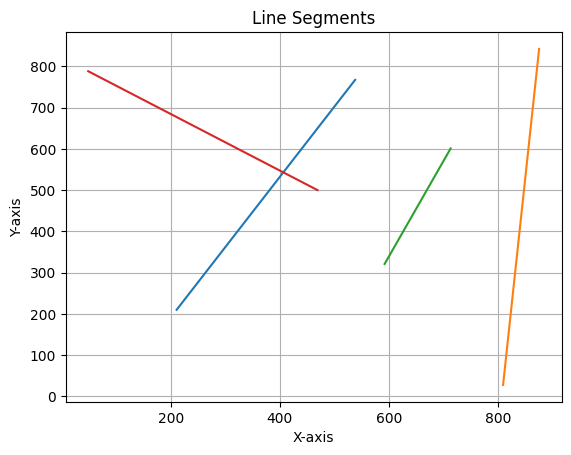

In [703]:
import matplotlib.pyplot as plt

def generateSegment(min, max):
    x1 = randint(min, max)  
    y1 = randint(min, max)  
    x2 = randint(min, max)  
    y2 = randint(min, max) 
    section = ((x1, y1), (x2, y2))
    return section

def generateSegments(count, min, max):
    segments = []
    for _ in range(0, count):
        segment = generateSegment(min, max)
        segments.append(segment)
    return segments

segmentsOriginal = generateSegments(4, 0, 1000)

segments = map(
    lambda points: 
    Segment(
        Point(points[0][0], points[0][1]), 
        Point(points[1][0], points[1][1])
    ), 
    segmentsOriginal
)

segments = list(segments)


print(anySegmentsIntersect(segments))
# Extract x and y coordinates for plotting
x_values = [x for segment in segmentsOriginal for x, y in segment]
y_values = [y for segment in segmentsOriginal for x, y in segment]

# Plot line segments
for segment in segmentsOriginal:
    x1, y1 = segment[0]
    x2, y2 = segment[1]
    plt.plot([x1, x2], [y1, y2])

# Customize the plot (labels, title, etc.)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Line Segments")

# Show the plot
plt.grid(True)
plt.show()

In [704]:
points1 = create_points(50, 0, 50)
hull1 = giftWrapping(points1)

points2 = create_points(50, 50, 100)
hull2 = giftWrapping(points2)
    

def scatterPlots(classification1, classification2):
    xs1 = []
    ys1 = []
    coords1 = classification1[0]
    hull1 = classification1[1]
    for coord in coords1:
        xs1.append(coord.x)
        ys1.append(coord.y)

    plt.scatter(xs1, ys1, color='blue')

    for i in range(1, len(hull1) + 1):
        if i == len(hull1): i = 0 #wrap
        c0 = hull1[i-1]
        c1 = hull1[i]
        plt.plot((c0.x, c1.x), (c0.y, c1.y), 'r')


    xs2 = []
    ys2 = []
    coords2 = classification2[0]
    hull2 = classification2[1]
    for coord in coords2:
        xs2.append(coord.x)
        ys2.append(coord.y)

    plt.scatter(xs2, ys2, color='green')

    for i in range(1, len(hull2) + 1):
        if i == len(hull2): i = 0 #wrap
        c0 = hull2[i-1]
        c1 = hull2[i]
        plt.plot((c0.x, c1.x), (c0.y, c1.y), 'y')

    plt.show()


In [705]:
def hullToSegments(hull):
    segments = []
    prevPoint = hull[0]
    for i in range(1, len(hull)):
        segments.append(Segment(prevPoint, hull[i]))
        prevPoint = hull[i]
    return segments

def splitSegments(segments):
    evenSegments = []
    oddSegments = []
    for i in range(0, len(segments)):
        if i % 2 == 0:
            evenSegments.append(segments[i])
        else:
            oddSegments.append(segments[i])

    return (evenSegments, oddSegments)    
    
def hullIntersects(hull1, hull2):
    segments1 = hullToSegments(hull1)
    segments2 = hullToSegments(hull2)

    (even1, odd1) = splitSegments(segments1)
    (even2, odd2) = splitSegments(segments2)

    # print(anySegmentsIntersect(even1 + even2))
    # print(anySegmentsIntersect(even1 + odd2))
    # print(anySegmentsIntersect(odd1 + even2))
    
    # for s in odd1+odd2:
    #     print(s)

    # for segment in odd1+odd2:
    #     x1, y1 = segment.p1.x, segment.p1.y
    #     x2, y2 = segment.p2.x, segment.p2.y
    #     plt.plot([x1, x2], [y1, y2])

    # # Customize the plot (labels, title, etc.)
    # plt.xlabel("X-axis")
    # plt.ylabel("Y-axis")
    # plt.title("Line Segments")

    # # Show the plot
    # plt.grid(True)
    # plt.show()


    # print(anySegmentsIntersect(odd1 + odd2))
   

    if (
        anySegmentsIntersect(even1 + even2)
        or anySegmentsIntersect(even1 + odd2)
        or anySegmentsIntersect(odd1 + even2)
        or anySegmentsIntersect(odd1 + odd2)
    ): return True

    return False


In [706]:
import sys

largestInt = sys.maxsize

def isInside(poly, p):
    n = len(poly)
    if n < 3:
        return False
    
    exline = Segment(p, Point(largestInt, p.y))
    count = 0
    for i in range(0, n-1):
        side = Segment(poly[i], poly[i + 1])
        if intersect(side, exline):
            count += 1

    if count % 2 == 0:
        return False 
    return True

As envoltórias são linearmente separáveis!


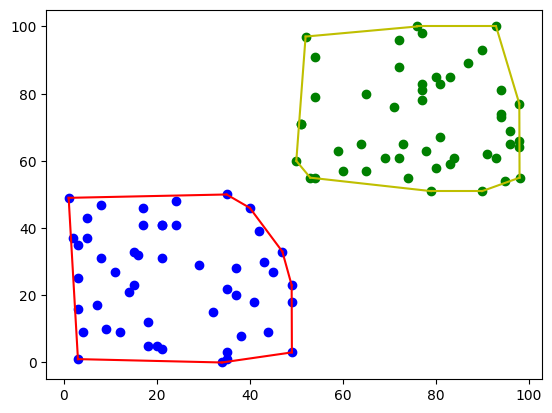

In [707]:
def isLinearlySeparable(hull1, hull2):
    if hullIntersects(hull1, hull2):
        return False
    
    if isInside(hull1, hull2[0]) or isInside(hull2, hull1[0]):
        return False
    
    return True

printAux = '' if isLinearlySeparable(hull1, hull2) else 'NÃO ' 
print('As envoltórias ' + printAux + 'são linearmente separáveis!')
scatterPlots((points1, hull1), (points2, hull2))

In [708]:
def getClosestPoints(hull1, hull2):
    closestPoint1 = Point(0, 0)
    closestPoint2 = Point(0, 0)

    auxPoint = hull1[0]
    minDistance = largestInt
    minDistancePoint = hull2[0]
    for point in hull2:
        distance = squaredDistance(auxPoint, point)
        if distance < minDistance:
            minDistance = distance
            minDistancePoint = point

    closestPoint2 = minDistancePoint

    minDistance = largestInt
    minDistancePoint
    for point in hull1:
        distance = squaredDistance(closestPoint2, point)
        if distance < minDistance:
            minDistance = distance
            minDistancePoint = point

    closestPoint1 = minDistancePoint

    return (closestPoint1, closestPoint2)


In [709]:
closestPoints = getClosestPoints(hull1, hull2)

for point in closestPoints:
    print(point)

(40, 46)
(50, 60)
